In [ ]:
import os

def sort_listdir(directory):
    def get_creation_time(item):
        item_path = os.path.join(directory, item)
        return os.path.getctime(item_path)

    items = os.listdir(directory)
    sorted_items = sorted(items, key=get_creation_time, reverse=True)
    return sorted_items

eventos_dir = os.path.abspath("")+"\\eventos\\"
graficos_dir = os.path.abspath("")+"\\graficos\\"

n_est = "2"

evento_list =[_ for _ in os.listdir(eventos_dir) if f"estrategia_{n_est}{n_est}" in _]
evento_list

['estrategia_33_500000_prob_0_100.json',
 'estrategia_33_500000_prob_100.json',
 'estrategia_33_500000_prob_10_100.json',
 'estrategia_33_500000_prob_20_100.json',
 'estrategia_33_500000_prob_30_100.json',
 'estrategia_33_500000_prob_40_100.json',
 'estrategia_33_500000_prob_50_100.json',
 'estrategia_33_500000_prob_60_100.json',
 'estrategia_33_500000_prob_70_100.json',
 'estrategia_33_500000_prob_80_100.json',
 'estrategia_33_500000_prob_90_100.json']

In [2]:
import sys, json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter
df = pd.DataFrame()

for evento_name in evento_list:
    evento_path = eventos_dir+evento_name
    print(f"leyendo archivo {evento_name}")
    
    with open(evento_path, 'r') as file: 
        
        fstring = json.load(file)

        tmp_df = pd.DataFrame(fstring["secuencia"])
        info = fstring["config"]
        
        tmp_df = tmp_df[["time","pts_A","pts_B","ganador"]].drop_duplicates().reset_index().rename(columns={'index': 'indice'})
        tmp_df["diff"] = tmp_df["pts_A"] - tmp_df["pts_B"]
        tmp_df["prob"] = int(info.split("prob_A:")[1].split(",")[0])
        
        df = pd.concat([df, tmp_df], ignore_index=True)

        del fstring


leyendo archivo estrategia_33_500000_prob_0_100.json
leyendo archivo estrategia_33_500000_prob_100.json
leyendo archivo estrategia_33_500000_prob_10_100.json
leyendo archivo estrategia_33_500000_prob_20_100.json
leyendo archivo estrategia_33_500000_prob_30_100.json
leyendo archivo estrategia_33_500000_prob_40_100.json
leyendo archivo estrategia_33_500000_prob_50_100.json
leyendo archivo estrategia_33_500000_prob_60_100.json
leyendo archivo estrategia_33_500000_prob_70_100.json
leyendo archivo estrategia_33_500000_prob_80_100.json
leyendo archivo estrategia_33_500000_prob_90_100.json


In [3]:
df.head()

,indice,time,pts_A,pts_B,ganador,diff,prob
0,0,3,0,1,B,-1,0
1,1,5,0,2,B,-2,0
2,2,7,0,3,B,-3,0
3,3,9,0,4,B,-4,0
4,4,11,0,5,B,-5,0


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


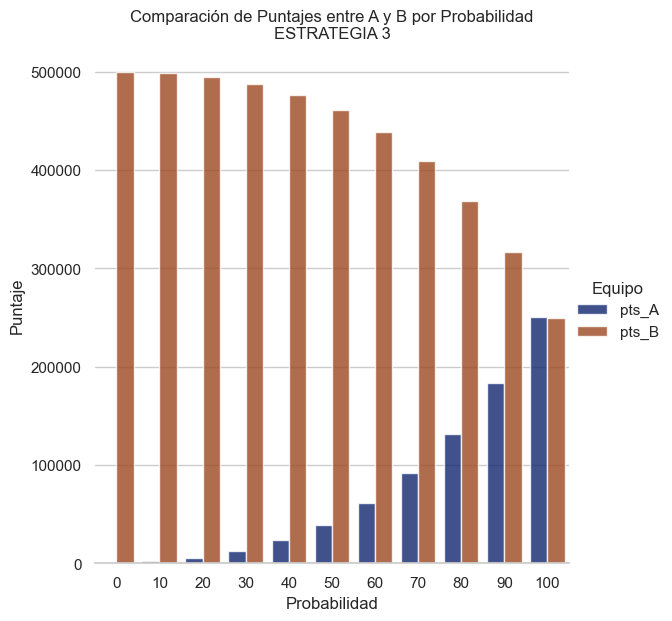

In [6]:
# Filtrar el último partido para cada probabilidad
ultimo_por_prob = df.loc[df.groupby("prob")["time"].idxmax()]

# Transformar los datos para la comparación
df_comparacion = pd.melt(
    ultimo_por_prob,
    id_vars=["prob", "ganador"],  # Mantener estas columnas
    value_vars=["pts_A", "pts_B"],  # Transformar estas columnas
    var_name="Equipo",  # Nueva columna indicando el equipo
    value_name="Puntos"  # Nueva columna con los valores de los puntos
)

# Crear el gráfico
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_comparacion, kind="bar",
    x="prob", y="Puntos", hue="Equipo",
    palette="dark", alpha=.8, height=6
)

# Ajustes del gráfico
g.despine(left=True)
g.set_axis_labels("Probabilidad", "Puntaje")
g.legend.set_title("Equipo")
plt.title(f"Comparación de Puntajes entre A y B por Probabilidad\nESTRATEGIA {n_est}")
plt.show()

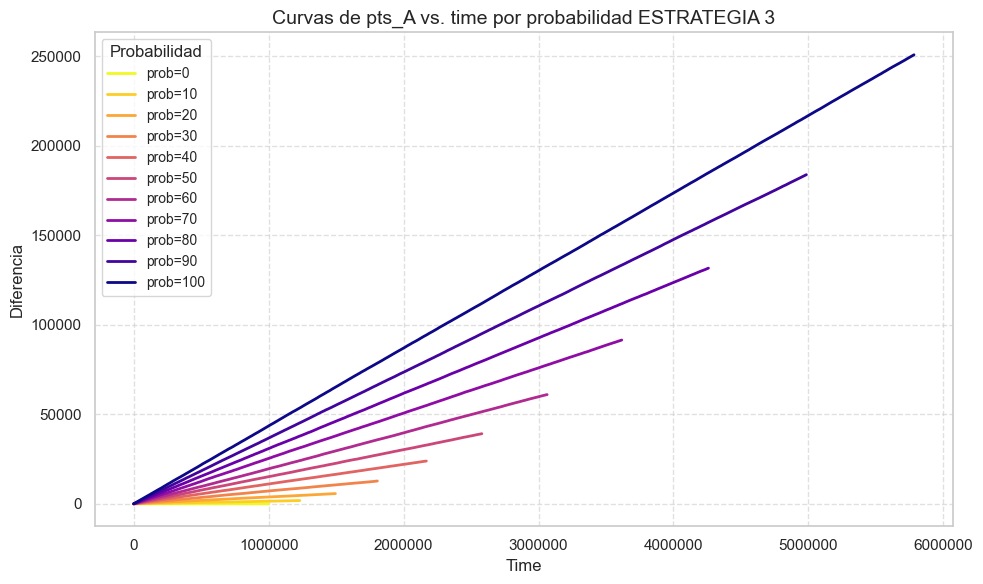

In [5]:
cmap = plt.cm.plasma.reversed()
unique_probs = sorted(df["prob"].unique())
colors = [cmap(i / max(unique_probs)) for i in unique_probs]

# Graficar las curvas
plt.figure(figsize=(10, 6))
for prob, color in zip(unique_probs, colors):
    subset = df[df["prob"] == prob]
    plt.plot(
        subset["time"],
        subset["pts_A"],
        label=f"prob={prob}",
        color=color,
        linewidth=2,
    )

# Etiquetas y leyenda
plt.title(f"Curvas de pts_A vs. time por probabilidad ESTRATEGIA {n_est}", fontsize=14)
plt.xlabel("Time", fontsize=12)

plt.ylabel("Diferencia", fontsize=12)
plt.legend(title="Probabilidad", loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='both')

plt.tight_layout()

# Mostrar el gráfico
plt.show()